In [ ]:
import os
import sys

# Go to the root of the project experiments directory
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), "../../"))
os.chdir(PROJECT_ROOT)  # THIS sets the working directory permanently

if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

In [25]:
from utils.report_project_stats import * # Corrected import assuming project root is in sys.path


In [26]:
INTERACTIVE_CHARTS=False

# Smaller to bigger memory on CoLA Report

Initial memory is two times smaller than memory for average rank of 25 for epochs 0-2, then it grows linearly on epochs 3-7 and stabilized at memory that is average for rank of 25 on epochs 8-49.  rank_allocation_weights initialized to random, same scheduling, discrete rank on the last epoch.

Baseline: LoRA-XS with rank 25 - 68.55+-0.81


Script:
```bash
python scripts/run_glue_adaptive.py --target_task cola --wandb_disabled False  --seed $SEED --rank_allocation_lr $rank_allocation_lr --epoch 50  --rank_min 5 --rank_max 30 --memory_start 30000 --memory_end 60000 --epochs_memory_start 3 --epochs_memory_start_to_end 5 --epochs_rank_discrete 1 
```

| Task   |   Rank Min |   Rank Max |   Alpha Min |   Alpha Max |    LR |   Rank Avg | Median ± Std   |
|:-------|-----------:|-----------:|------------:|------------:|------:|-----------:|:---------------|
| cola   |          5 |         30 |         0.5 |           3 | 0.002 |         17 | 53.65 ± 0.45   |
| cola   |          5 |         30 |         0.5 |           3 | 0.02  |         17 | 53.23 ± 0.75   |
| cola   |          5 |         30 |         0.5 |           3 | 0.01  |         17 | 53.12 ± 0.67   |

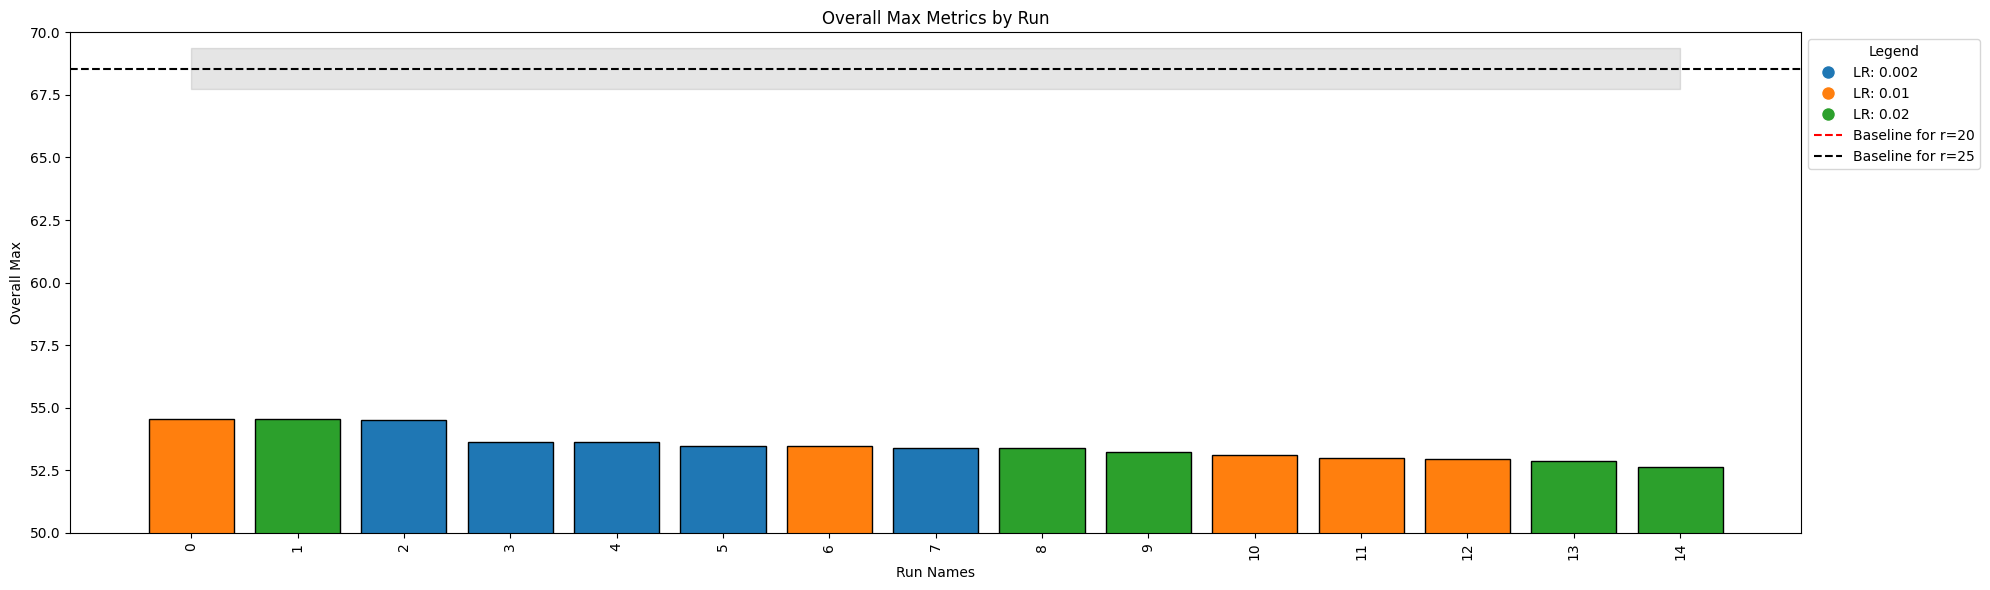

In [27]:
project = "adalora_memory_to_double_memory_3_5"
entity = "mallahova"
date_before=datetime(2025, 4, 14)
display_project_stats(project=project, entity=entity, starts_with="", date_before=date_before )

The problem might be that the model learns the most during the first epochs and it doesn't have the whole memory at the start. Other thing is that the learning rate scheduler is not alligned with memory scheduler - the lerning rate is decreasing when the model has just gotten enough memory to learn.

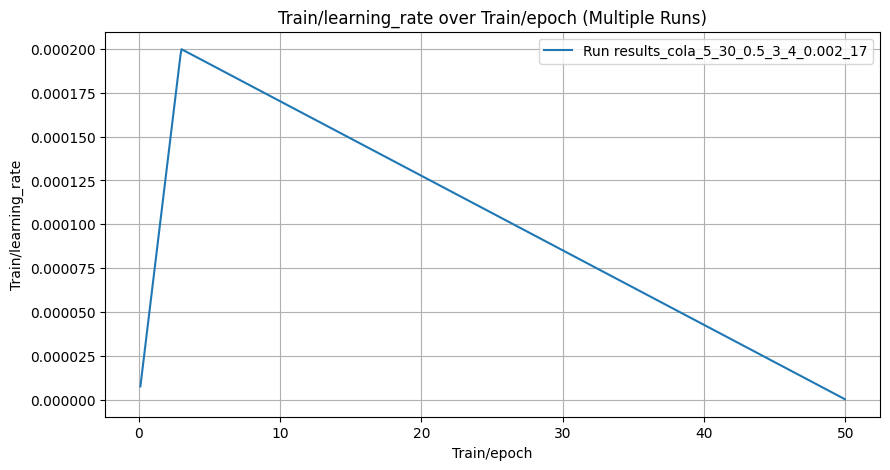

In [28]:
fetch_and_plot_wandb_runs(
    entity="mallahova",
    project="adalora_memory_to_double_memory_3_5",
    metric="train/learning_rate",
    x_axis="train/epoch",
    interactive=INTERACTIVE_CHARTS,
    num_runs=1,
    date_before=date_before
)

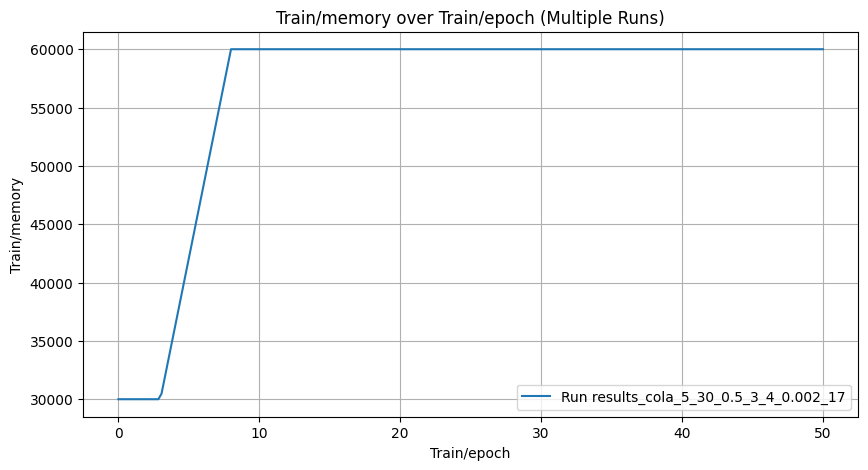

In [29]:
fetch_and_plot_wandb_runs(
    entity="mallahova",
    project="adalora_memory_to_double_memory_3_5",
    metric="train/memory",
    x_axis="train/epoch",
    interactive=INTERACTIVE_CHARTS,
    num_runs=1,
    date_before=date_before

)

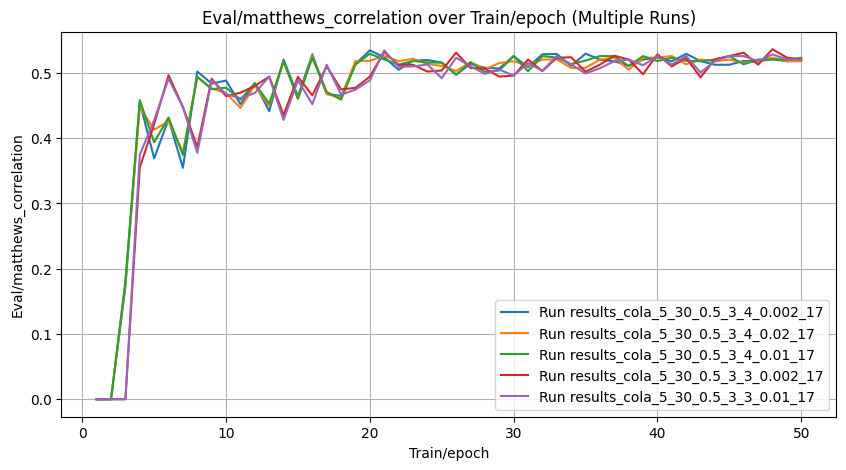

In [30]:
fetch_and_plot_wandb_runs(
    entity="mallahova",
    project="adalora_memory_to_double_memory_3_5",
    metric="eval/matthews_correlation",
    x_axis="train/epoch",
    interactive=INTERACTIVE_CHARTS,
    date_before=date_before

)

## Same setup, but with constant learning rate scheduler
Initial memory is two times smaller than memory for average rank of 25 for epochs 0-2, then it grows linearly on epochs 3-7 and stabilized at memory that is average for rank of 25 on epochs 8-49.  rank_allocation_weights initialized to random, same scheduling, discrete rank on the last epoch.

Baseline: LoRA-XS with rank 25 - 68.55+-0.81

Script:
```bash
python scripts/run_glue_adaptive.py --target_task cola --wandb_disabled False  --seed $SEED --rank_allocation_lr $rank_allocation_lr --epoch 50  --rank_min 5 --rank_max 30 --memory_start 30000 --memory_end 60000 --epochs_memory_start 3 --epochs_memory_start_to_end 5 --epochs_rank_discrete 1 --lr_scheduler constant_schedule
```

| Task   |   Rank Min |   Rank Max |   Alpha Min |   Alpha Max |    LR | Rank Avg   | Median ± Std   |
|:-------|-----------:|-----------:|------------:|------------:|------:|:-----------|:---------------|
| cola   |          5 |         30 |         0.5 |           3 | 0.002 |            | 67.71 ± 1.25   |
| cola   |          5 |         30 |         0.5 |           3 | 0.01  |            | 67.69 ± 1.20   |
| cola   |          5 |         30 |         0.5 |           3 | 0.02  |            | 66.96 ± 1.13   |

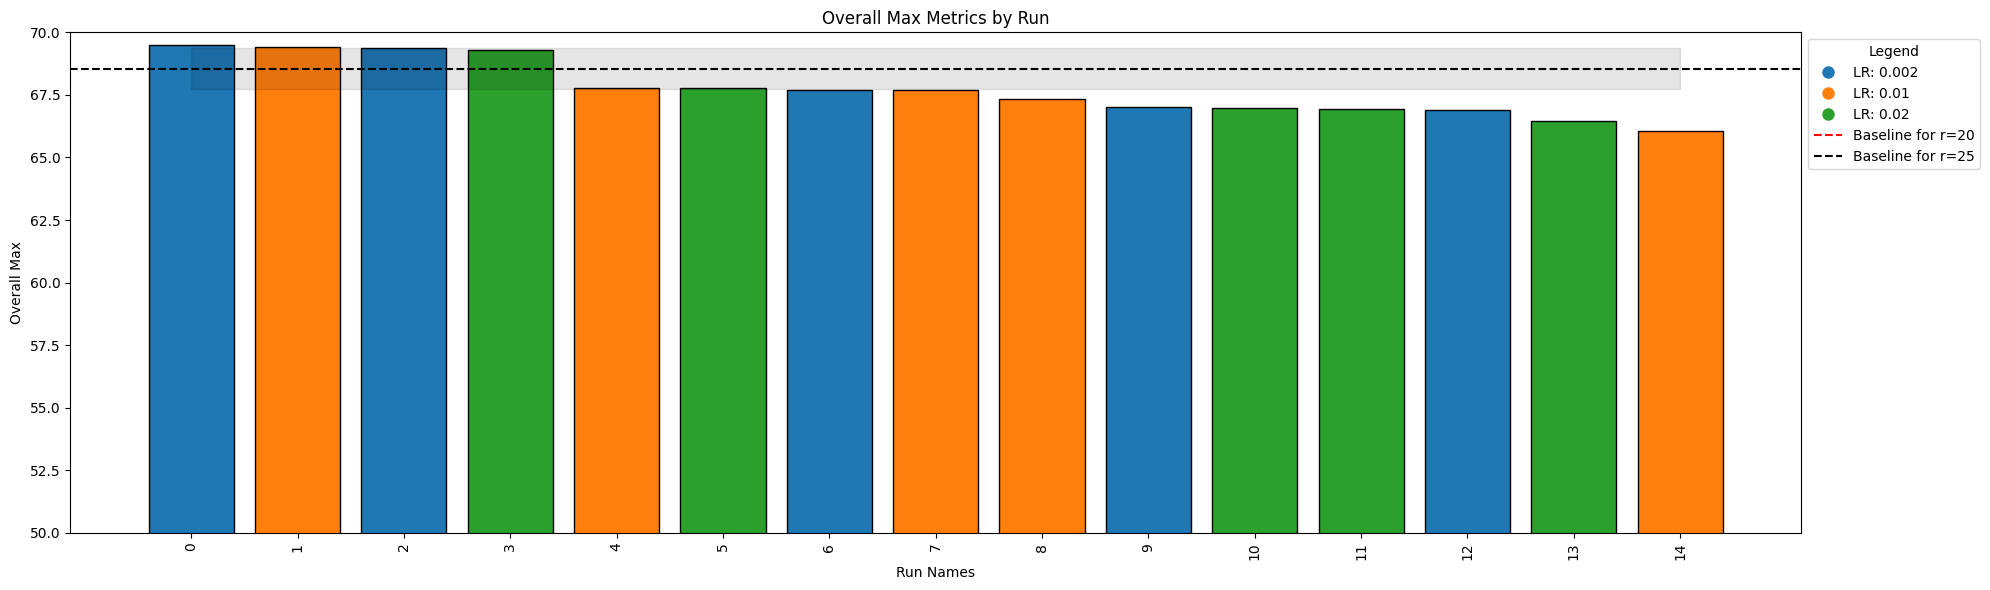

In [31]:
project = "adalora_memory_to_double_memory_3_5"
entity = "mallahova"
date_after=datetime(2025, 4, 14)
display_project_stats(project=project, entity=entity, starts_with="", date_after=date_after )

The results are slightly below the baseline

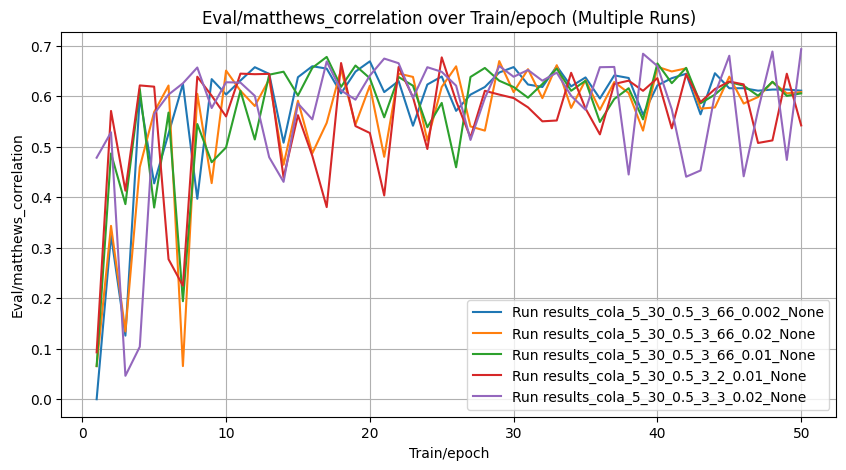

In [32]:
fetch_and_plot_wandb_runs(
    entity="mallahova",
    project="adalora_memory_to_double_memory_3_5",
    metric="eval/matthews_correlation",
    x_axis="train/epoch",
    interactive=INTERACTIVE_CHARTS,
    date_after=date_after
)